In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Gathering

In [57]:
data = pd.read_csv('Iris.csv')

# Data Pre-Processing

In [58]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
data.drop(columns=['Id'], inplace=True)
data.head()
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


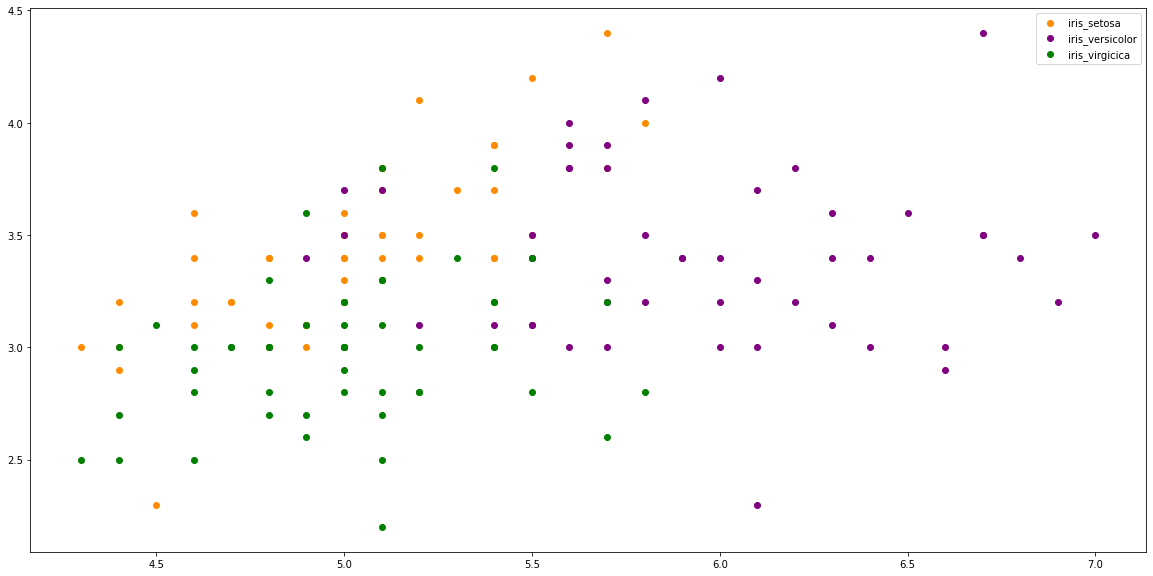

In [60]:
iris_setosa = data[data[list(data.columns)[-1]] == "Iris-setosa"]
iris_versicolor = data[data[list(data.columns)[-1]] == "Iris-versicolor"]
iris_virginica = data[data[list(data.columns)[-1]] == "Iris-virginica"]

fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.scatter(iris_setosa[["SepalLengthCm"]], iris_setosa[["SepalWidthCm"]], c="darkorange", label="iris_setosa")
axes.scatter(iris_versicolor[["SepalLengthCm"]], iris_setosa[["SepalWidthCm"]], c="purple", label="iris_versicolor")
axes.scatter(iris_setosa[["SepalLengthCm"]], iris_virginica[["SepalWidthCm"]], c="green", label="iris_virgicica")
axes.legend()
plt.show()

# Labeling

In [61]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [62]:
Y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [63]:
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)
scaledX

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [65]:
X.mean()

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

In [66]:
scaledX.mean()

-2.486899575160351e-16

# Split Data on Train & Test

In [67]:
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    scaledX, encodedY, test_size=0.2, random_state=3
)

# Modeling

In [68]:
from sklearn import neighbors

init_knn = neighbors.KNeighborsClassifier(
    n_neighbors=3
)
init_knn.fit(xtrain,ytrain)

ypred = init_knn.predict(xtest)

from sklearn.metrics import f1_score, confusion_matrix
print("Confusion Matrix: ", confusion_matrix(ytest, ypred))
print("F1 Score: ", f1_score(y_true=ytest, y_pred=ypred, average=None))


Confusion Matrix:  [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
F1 Score:  [1.  0.9 0.9]


In [69]:
init_knn.predict([xtest[0, :]])

array([0])

In [70]:
init_knn.predict([xtest[10, :]])

array([1])

In [71]:
init_knn.predict([xtest[20, :]])

array([2])

In [72]:
ytest[0]

0

In [73]:
ytest[10]

1

In [74]:
ytest[20]

2

In [75]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(
    knn,
    param_grid={
        "n_neighbors":list(range(5, 30, 2))
    },
    cv=5,
    scoring="accuracy"
)
grid.fit(xtest, ytest)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

In [76]:
grid.best_params_


{'n_neighbors': 5}

In [77]:
grid.best_score_

0.9

# Model Finally Fit & Analysis

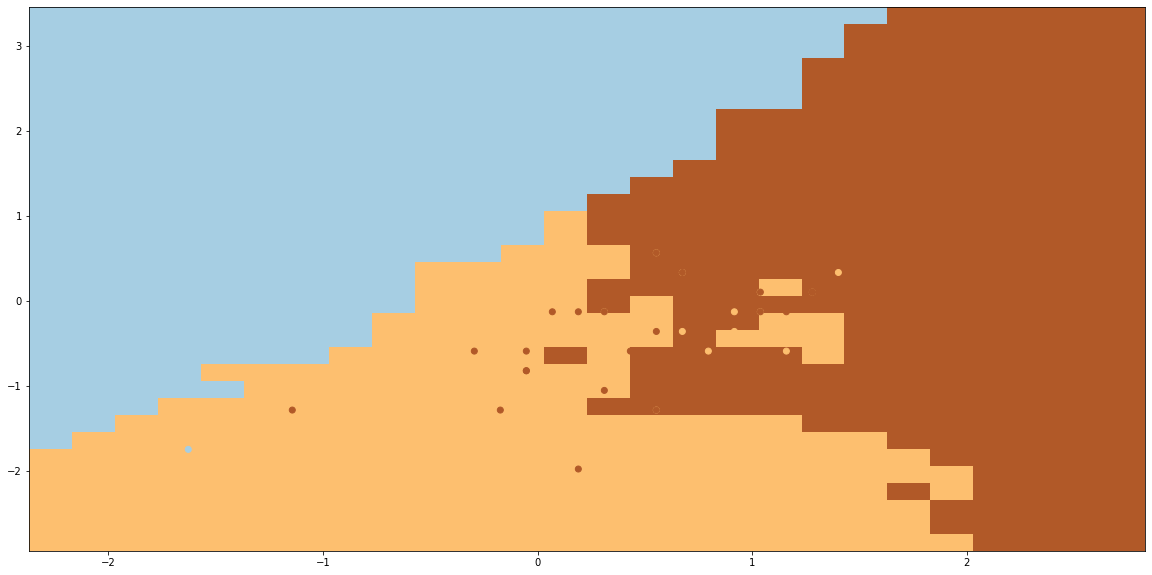

In [81]:
final_knn = neighbors.KNeighborsClassifier()
final_knn.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:, 0].min() - .5, scaledX[:, :2][:, 0].max() + 0.5
ymin, ymax = scaledX[:, :2][:, 1].min() - .5, scaledX[:, :2][:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
z = final_knn.predict(np.c_[xx.ravel(), yy.ravel()])
z

## Color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

## Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, :2][:, 1],c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.yticks()
plt.xticks()
plt.show()